# ふるさと納税クロスABC分析

ここでは，クロスABC分析の例として自治体別のふるさと納税のデータを用いて簡単な分類をおこないます．寄付金額と寄付件数を指標として，寄付金額，寄付件数がともに多い自治体を洗い出したり，寄付金額は多いけれども寄付件数が少ない自治体，あるいはその逆の自治体を抽出してみたいと思います．

## 下準備

分析をおこなうにあたって必要となるライブラリのインポートをおこないます．今回は描画処理をおこなう **matplotlib** と **seaborn**，さらにデータの処理などを楽におこなうことができる **pandas** を使用します．

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

また今回の肝である，**crossabc** もこの段階でインポートしておきます．**CrossABC** クラスを使用するので，

In [2]:
from crossabc import CrossABC

のようにインポートします．

## データ紹介

それでは今回扱うデータ **example.csv** を紹介します．
今回のデータは **ふるさと納税** に関するデータであり，**2008年度** から **2019年度** における各自治体の **寄付金額(amount_)**(単位は千円) と **寄付件数(number_)**(単位は件) が入力されています．
**出典** は **総務省のふるさと納税ポータルサイト** の[関連資料](https://www.soumu.go.jp/main_sosiki/jichi_zeisei/czaisei/czaisei_seido/furusato/archive/)であり，そちらを元に加工しました．
さっそくみてみましょう．

In [3]:
df = pd.read_csv('example.csv', index_col=1)

df.head()

,Prefecture,amount_2008,amount_2009,amount_2010,amount_2011,amount_2012,amount_2013,amount_2014,amount_2015,amount_2016,...,number_2010,number_2011,number_2012,number_2013,number_2014,number_2015,number_2016,number_2017,number_2018,number_2019
City,,,,,,,,,,,,,,,,,,,,,
北海道,北海道,4660,52685,2770,3670,5688,10792,1798,2144,13457,...,25.0,32.0,139.0,267.0,64.0,39.0,51,98,3996,324
札幌市,北海道,397801,514419,11073,100330,121572,139244,200533,106100,364428,...,88.0,247.0,365.0,177.0,170.0,200.0,300,247,1219,2240
函館市,北海道,5177,4745,3301,3846,5139,14880,10573,17032,11380,...,47.0,53.0,66.0,150.0,257.0,240.0,207,4211,10744,43753
小樽市,北海道,56757,22717,30036,23209,11971,27136,38989,33039,50892,...,185.0,163.0,165.0,204.0,239.0,193.0,781,5552,7644,7346
旭川市,北海道,14090,33603,10271,7161,8414,22468,41834,103494,182256,...,98.0,84.0,95.0,150.0,224.0,2806.0,5404,7269,26142,81238


**City** 列には，**各自治体の名前** が入力されています．またCity列に **県の名前** が入力されている場合は，ふるさと納税がその **県** に対して納められたということになります．

## モジュールの紹介

それではこのようなデータに対して簡単に分析をおこなってみましょう．
まずは，**2019年度** において，**寄付金額(amount_2019)** と **寄付件数(number_2019)** が両者ともに多かった自治体を抽出してみたいと思います．このような時に活躍するのが，**CrossABC**です．手短にどのような分析手法か知りたい方はこちらの[記事](https://biz.moneyforward.com/accounting/basic/22225/)をオススメします．

まずは分析用にデータを整形し直します(この工程は必ずしもおこなう必要はないです)．

In [4]:
analyzed_df = df[['Prefecture', 'amount_2019', 'number_2019']]

analyzed_df.head()

,Prefecture,amount_2019,number_2019
City,,,
北海道,北海道,8209,324
札幌市,北海道,456499,2240
函館市,北海道,579859,43753
小樽市,北海道,152107,7346
旭川市,北海道,1313437,81238


次に，**クロスABCオブジェクト** を作成します．**crossabc.CrossABC()** は
- 第1引数: **df** (pandas.Dataframe型で，カラム数が最低2個以上必要)
- 第2引数: **indicators** (指標のリスト． 第1引数で指定したdfのカラム名から相異なる2つのカラムを指定)

を必要とします．

In [5]:
cross_abc = CrossABC.create(analyzed_df, indicators=['amount_2019', 'number_2019'])

**CrossABC().get_histgram()** メソッドは，上位 $x$ %に存在するデータ数を表した2次元の表を返します．横軸が第1指標(amount_2019)で 縦軸が第2指標(number_2019)であることに注意してください．pandas.Dataframe()の形式で返します．

In [6]:
hist_df = cross_abc.get_histgram()

hist_df

,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
10%,4,1,0,0,0,0,0,0,0,0
20%,0,6,5,0,0,0,0,0,0,0
30%,0,3,9,4,2,0,0,0,0,0
40%,0,1,1,13,9,2,1,0,0,0
50%,0,0,2,8,13,14,2,0,0,0
60%,0,1,0,4,8,19,20,3,0,0
70%,0,0,1,1,3,17,30,25,4,0
80%,0,0,2,0,5,7,20,51,35,1
90%,0,0,0,0,2,4,9,40,116,46
100%,0,0,0,0,2,3,9,15,74,1111


この **hist_df** は非常に見づらいので **seaborn** の **heatmap** を利用して綺麗に描画してみたいと思います．

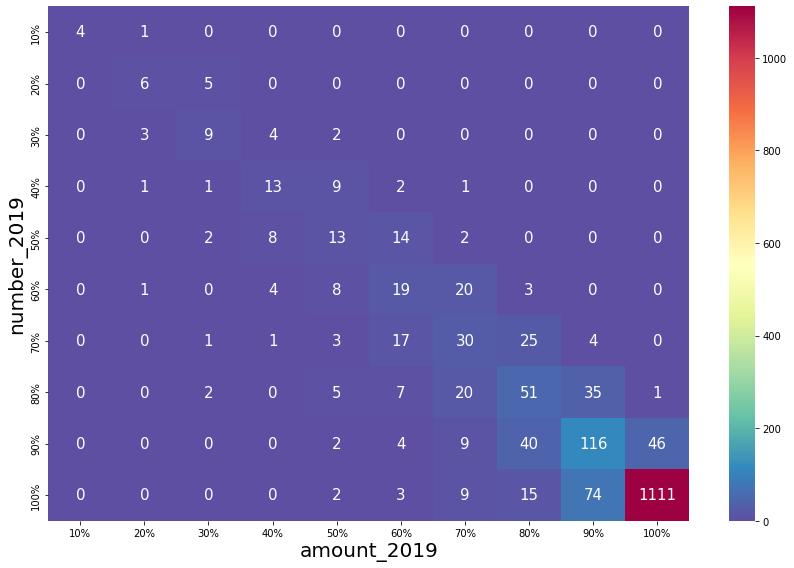

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(hist_df, annot=True, annot_kws={'fontsize': 15}, fmt='d', cmap='Spectral_r')
plt.xlabel('amount_2019', fontsize=20)
plt.ylabel('number_2019', fontsize=20)
plt.tight_layout()

綺麗に描画できました．簡単に言えば左上に位置すればするほどその自治体は寄付金額が多額で，かつ寄付件数も多いことを表します．この図は各ブロックに含まれる自治体が何個あるのかを表現した図となります．

## 分析

左上のように寄付金額も寄付件数も最も多いグループには果たしてどのような自治体が含まれているのでしょうか．
またそのような自治体に共通するような特徴はあるのでしょうか．
さっそく検証してみましょう．
このような時は**CrossABC.get_elements()** メソッドを活用します．
**第1指標(amount_2019)** が **上位10%以下(0.1, '<=')**，**第2指標(number_2019)** も **上位10%以下(0.1, '<=')** であるような自治体を抽出してみましょう．

In [8]:
star_df = cross_abc.get_elements(ratios=[(0.1, '<='), (0.1, '<=')])

star_df

,Prefecture,amount_2019,number_2019
City,,,
都城市,宮崎県,10645341,503916
白糠町,北海道,6733389,460533
紋別市,北海道,7737695,448803
泉佐野市,大阪府,18496917,307630


すると，上位にいる自治体は **都城市，白糠町，紋別市，泉佐野市** であることがわかりました．
それでは次に，**寄付金額は多額だけれども寄付件数は少ない自治体**を見てみたいと思います．
もしかしたら少し単価を下げることで，寄付件数を上げることができて納税額アップにつながるかもしれません．
どのような自治体でどのような返礼品を用意しているのでしょうか．

In [9]:
amount_good_df = cross_abc.get_elements(ratios=[(0.2, '<='), (0.5, '>=')])

amount_good_df

,Prefecture,amount_2019,number_2019
City,,,
幸田町,愛知県,3849675,36414


**愛知県** の**幸田町** が抽出できました．
この町では返礼品として[寝具が用意されている](https://www.furusato-tax.jp/city/product/23501)ようで，単価も60,000円台と高額ですね．逆に，**寄付件数は多いけれども寄付金額は少ない自治体**を見てみたいと思います．
もしかしたら少し単価の高い返礼品を準備することで，寄付金額を上げることができて納税額アップにつながるかもしれません．どのような自治体でどのような返礼品を用意しているのでしょうか．

In [10]:
num_good_df = cross_abc.get_elements(ratios=[(0.4, '>='), (0.3, '<=')])

num_good_df

,Prefecture,amount_2019,number_2019
City,,,
当別町,北海道,1291814,108098
西伊豆町,静岡県,1193700,103690


**北海道** から **当別町** ，**静岡県** から **西伊豆町** が抽出できました．
特に当別町については他自治体と比べて[単価の高い返礼品が少ない](https://www.furusato-tax.jp/city/product/01303)ので，[白糠町](https://www.furusato-tax.jp/city/product/01668)や[紋別市](https://www.furusato-tax.jp/city/product/01219)に倣って単価の高い返礼品を用意することで納税額アップが期待できそうです．最後に，ABC分析ではよく **「2割が8割を表現する」** の法則が成り立つといわれます．
**2割(の自治体)が寄付金額(あるいは寄付件数)全体の8割を占めている** という構図ははたして成り立っているでしょうか．このデータ上には，全部で1,778の自治体が存在します．その中で，全体の寄付金額のうち8割までを占める自治体の数を求めると，

In [11]:
ans_df = cross_abc.get_elements(ratios=[(0.8, '<='), (1.0, '<=')])

ans_df

,Prefecture,amount_2019,number_2019
City,,,
都城市,宮崎県,10645341,503916
白糠町,北海道,6733389,460533
紋別市,北海道,7737695,448803
根室市,北海道,6589107,413575
泉佐野市,大阪府,18496917,307630
...,...,...,...
川崎市,神奈川県,373292,1622
東浦町,愛知県,449733,1430
常滑市,愛知県,346455,1087


**401** 自治体であることがわかりました．

In [12]:
print(401 / 1778)

0.22553430821147358


おおよそ **20%** が成り立ちました．